<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Francisco Maiocchi

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$


In [34]:
def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # Vector de tiempos
    tt = np.linspace(0, (N-1)/fs, N)
    
    # Generacion de la señal
    signal = a0*np.sin(2*np.pi*f0*tt + p0)
    
    # fin de la función
    
    return tt, signal

def generador_ruido (fs, N, mean = 0, variance = 0, high = 0, low = 0, left = -1, right = 1, peak = 0,  distribution = 'Normal'):
    """ 
    
    brief:  Generador de ruido, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    distribucion == 'Normal'
        mean: media
        variance: varianza
    distribuccion == 'Uniform'
        low: valor minimo
        high: valor maximo
    distribucion == 'Triangular'
        left: valor minimo
        peak: valor del pico
        right: valor maximo
    
    como resultado la señal devuelve:
    
    signal: ruido con valor medio u y varianza v 
    tt:     base de tiempo de la señal
    """
    # vector de tiempos
    tt = np.linspace(0, (N-1)/fs, N)
    
    if distribution == 'Normal':
        signal = np.random.normal(mean, np.sqrt(variance), N)  #normal recibe el desvio, no la varianza
    if distribution == 'Uniform':
        signal = np.random.uniform(low, high, N)
    if distribution == 'Triangular':
        signal = np.random.triangular(left, peak, right, N)
    
    return tt, signal    


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones.

In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10,10)

In [36]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

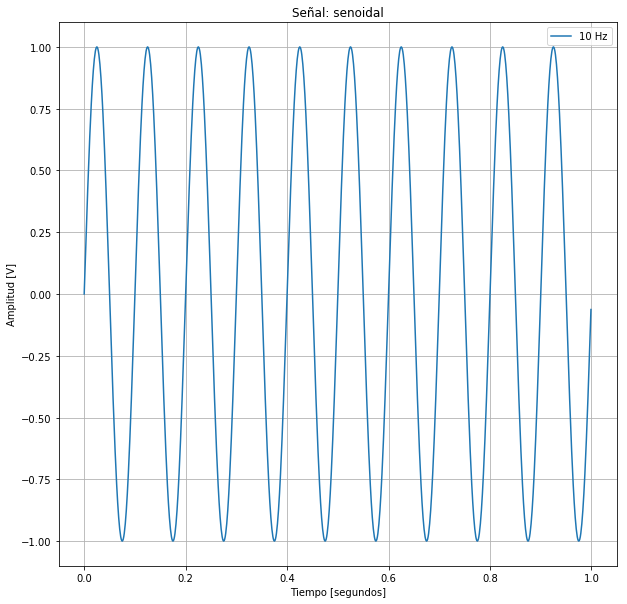

In [37]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Generacion de señal
tiempo, señal = generador_senoidal(fs, f0, N, a0, p0)

# Ploteo 
grafico = plt.plot(tiempo, señal, label = str(f0) + " Hz" ) 
plt.title('Señal: senoidal')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.xlim((-0.05,1.05))
plt.ylim((-1.1,1.1))
plt.grid()
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')


¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Sí, se puede observar que en un segundo se generan 10 ciclos de la señal, por lo que la frecuencia es de 10 Hz.
</div>

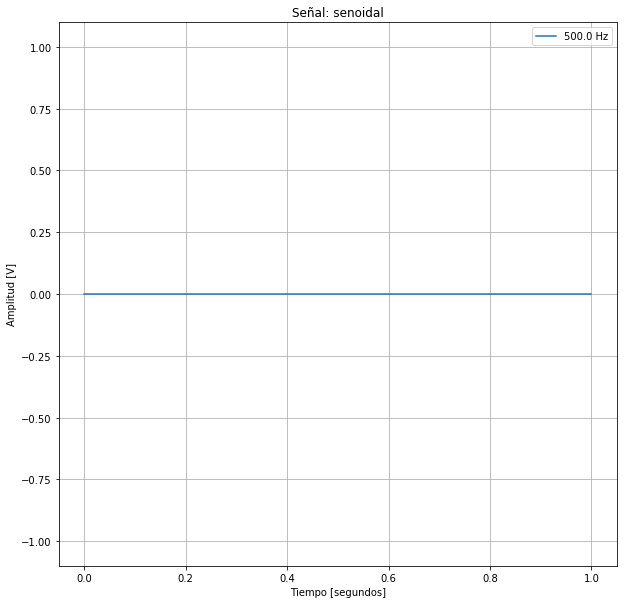

In [38]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Generacion de señal
tiempo, señal = generador_senoidal(fs, f0, N, a0, p0)

# Ploteo
plt.plot(tiempo, señal, label = str(f0) + " Hz" )
plt.title('Señal: senoidal')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.xlim((-0.05,1.05))
plt.ylim((-1.1,1.1))
plt.grid()
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

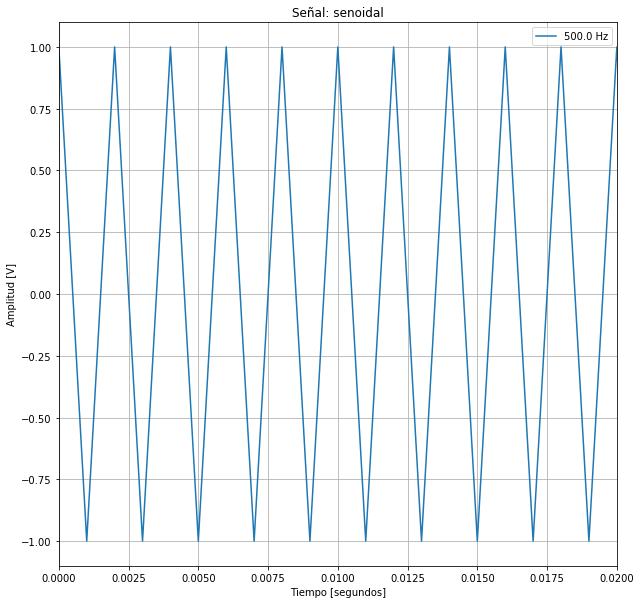

In [39]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Generacion de señal
tiempo, señal = generador_senoidal(fs, f0, N, a0, p0)

# Ploteo
plt.plot(tiempo, señal, label = str(f0) + " Hz" )  
plt.title('Señal: senoidal')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.xlim((0,0.02))
plt.ylim((-1.1,1.1))
plt.grid()
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')


¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Visualmente no es posible conocer los parametros de la senodial.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La frecuencia de la senoidal es de exactamente la mitad de la frecuencia de muestreo. Esto quiere decir que tengo dos muestras por periodo. En el caso 2, estoy muestreando en fase 0 y en fase $\pi$ donde la amplitud de la señal vale 0. Al interpolar los puntos con rectas, la resultante es una señal constante de valor cero. En el caso 3, se toman muestras en fase $\pi/2$ donde la señal vale 1 y en $3\pi/2$ donde la amplitud es -1. De esta forma, al unir los puntos con rectas, se visualiza una señal que parece una triangular.  

Para conocer los parametros de la señal visualmente, se necesitan más muestras por periodo que las que establece Nyquist.
</div>

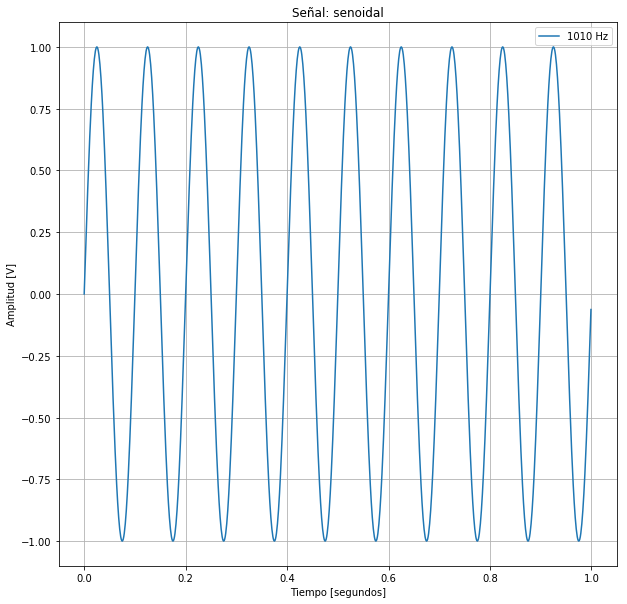

In [40]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Generacion de señal
tiempo, señal = generador_senoidal(fs, f0, N, a0, p0)

# Ploteo
grafico = plt.plot(tiempo, señal, label = str(f0) + " Hz" )  
plt.title('Señal: senoidal')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.xlim((-0.05,1.05))
plt.ylim((-1.1,1.1))
plt.grid()
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible difrenciar una señal de la otra.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En caso de estar muestreando una señal, hay que asegurarse que su frecuencia no sea mayor a $f_s$. Sin embargo, debido al efecto de aliasing, esta frecuencia nunca debería superar $f_s/2$. Esto se logra colocando un filtro antialias (pasa bajos) que elimine estas componentes. 
</div>

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

In [41]:
from scipy.fftpack import fft

def spectrum_analyzer(x, fs, N, plot = True):
    """ 
    
    brief:  Analizador de espectro
    
    x:      Señal en el dominio del tiempo
    fs:     Frecuencia de muestreo
    N:      Cantidad de muestras de la señal
    plot = True -> Se genera una figure con el espectro
    plot = False -> No se genera ningun plot
    
    como resultado la señal devuelve:
    
    y:      Parte real e imaginaria del espectro 
    """ 

    df = fs/N
    ff = np.linspace(0, int((N-1)*df), int(N))
    
    y = fft(x)
    
    if plot == True:
        plt.figure()
        plt.xlabel('f')
        plt.title('Espectro en frecuencia')
        plt.plot(ff[0:(N//2+1)], 2.0/N * np.abs(y[0:(N//2+1)]))
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Magnitud [V]')
        plt.grid()
    
    return y

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert$
,,,$F:f \neq f_0$
$f_S/4$,1,2.02323e-14,1.01545e-12
$f_S/4+0.01$,0.999834,0.0101014,0.12671
$f_S/4+0.25$,0.899609,0.300813,2.80229
$f_S/4+0.5$,0.636618,0.636624,4.28023


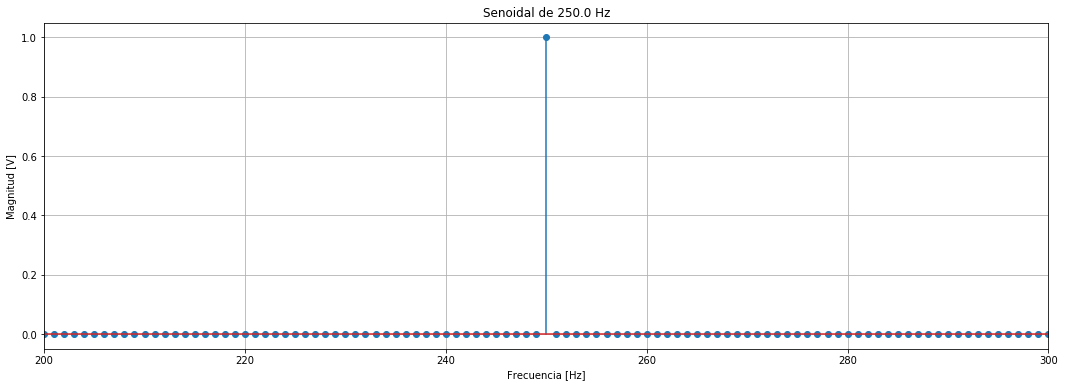

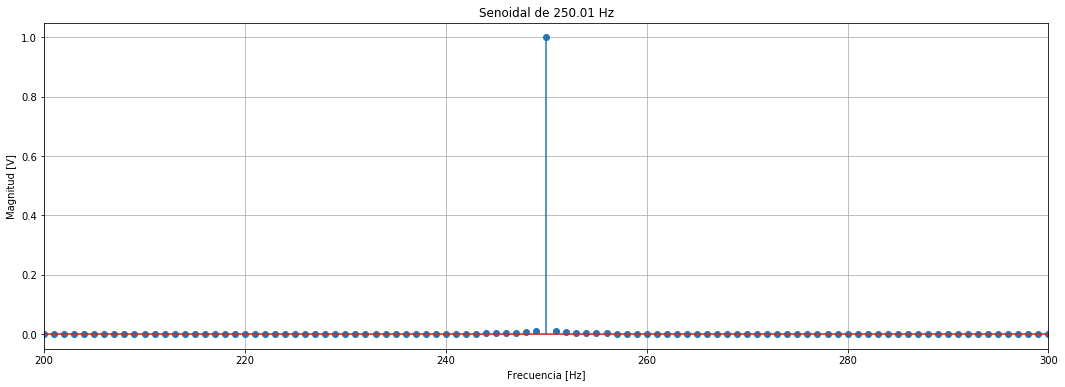

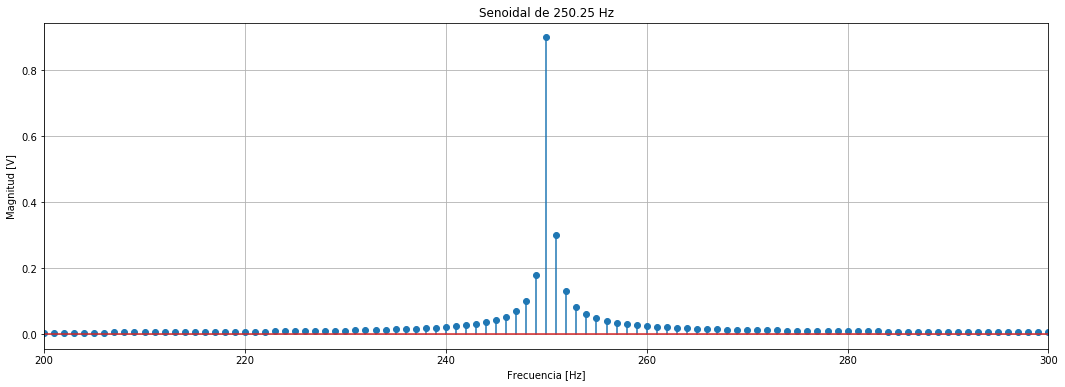

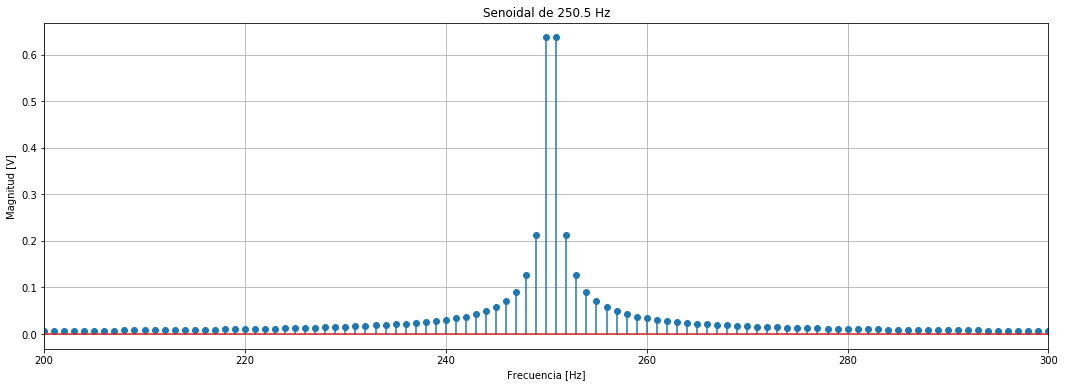

In [42]:
from pandas import DataFrame
from IPython.display import HTML

# Frecuencias de desintonia
fd=(0, 0.01, 0.25, 0.5)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

# Matriz donde voy a guardar los espectros resultantes
resultados = np.array([], dtype=np.float).reshape(N,0)

# Aca voy a guardar la sumatoria de todos los bins menos el de f0
resto_frecuencias = []

for i in range(len(fd)):
    resto_frecuencias.append(0)

# Genero las senoidales
for freq_offset in fd:
    tt, signal = generador_senoidal(fs, fs/4 + freq_offset, N)
    spectrum = spectrum_analyzer(signal, fs, N, plot = False)
    resultados = np.hstack([resultados, spectrum.reshape(N,1)])
    plt.figure(figsize = (18, 6))
    plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
    plt.xlabel('Frecuencia [Hz]')
    plt.xlim((200,300))
    plt.grid()
    plt.ylabel('Magnitud [V]')
    plt.title('Senoidal de ' + str(fs/4 + freq_offset) + ' Hz')
    

# Posicion en el vector columna del bin fs/4
m_f0 = int((fs/4)/df)

# Sumatoria del resto de las frecuencias
for freq in ff[0:(N//2-1)]:
    if freq != fs/4:
        for i in range(len(fd)):
            resto_frecuencias[i] = resto_frecuencias[i] + 2.0/N *np.abs(resultados[int(freq),i])
    
    
tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert$'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [2.0/N *np.abs(resultados[m_f0,0]), 2.0/N *np.abs(resultados[m_f0+1,0]), resto_frecuencias[0]], # <-- acá debería haber numeritos :)
                  [2.0/N *np.abs(resultados[m_f0,1]), 2.0/N *np.abs(resultados[m_f0+1,1]), resto_frecuencias[1]], # <-- acá debería haber numeritos :)
                  [2.0/N *np.abs(resultados[m_f0,2]), 2.0/N *np.abs(resultados[m_f0+1,2]), resto_frecuencias[2]], # <-- acá debería haber numeritos :)
                  [2.0/N *np.abs(resultados[m_f0,3]), 2.0/N *np.abs(resultados[m_f0+1,3]), resto_frecuencias[3]]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$. 
</div>

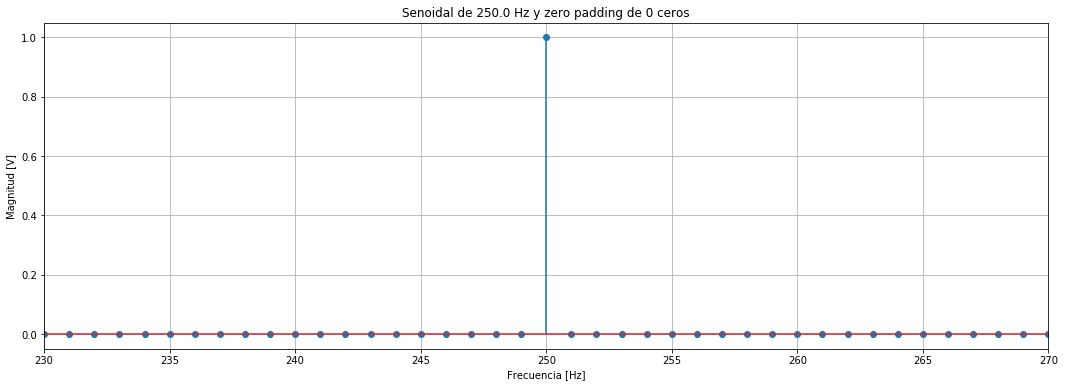

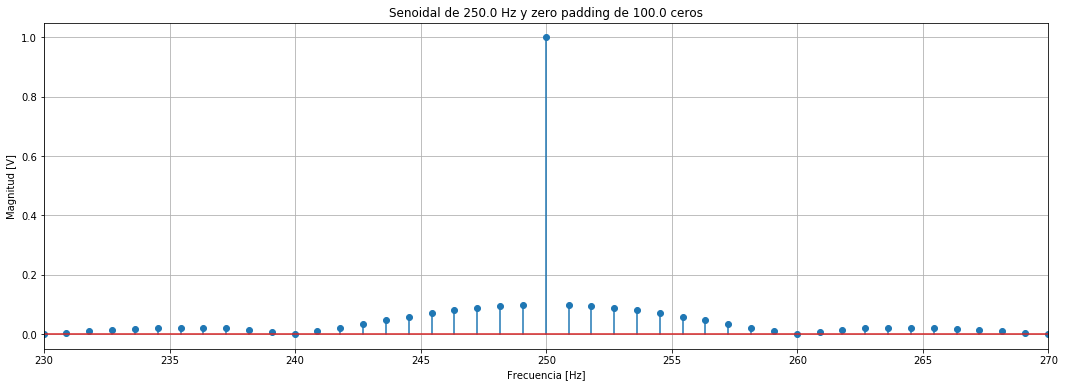

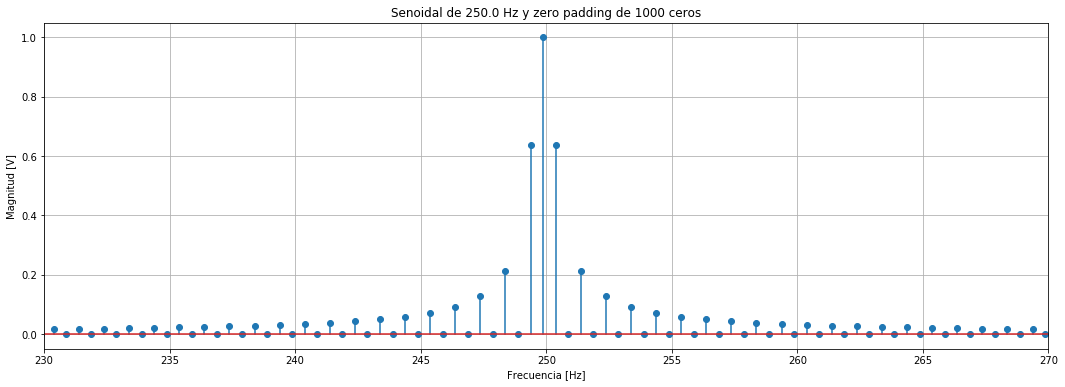

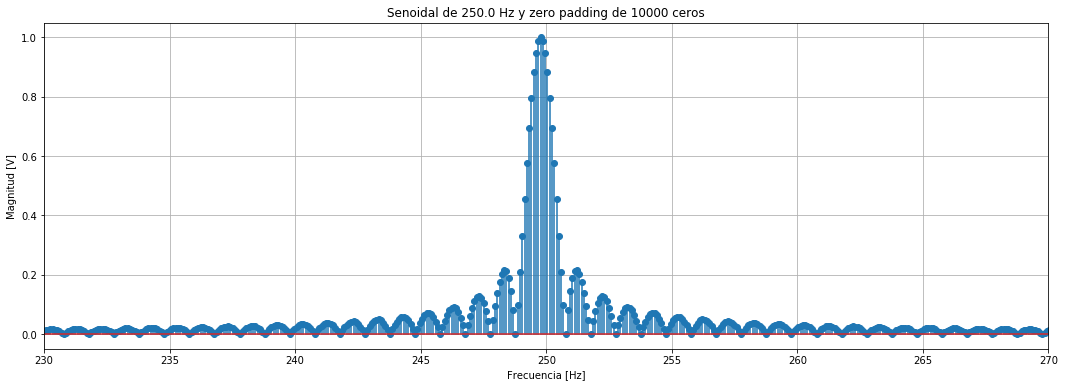

In [43]:
def zero_padding_testbench():
    fs = 1000   # Frecuencia de muestreo
    L = 1000    # Cantidad de muestras
    resultados = []     # Aca guardo los espectros resultantes 
    frecuencias = []    # Aca guardo el vector de frecuencias para cada caso
                         
    M = (0, L/10, L, 10*L) # Cantidad de ceros que se agregan
    
    fd = (0, 0.01, 0.25, 0.5)   # Offsets respecto al bin
    
    f0 = fs/4 + fd[0] # Frecuencia de la señal
    
    # Generacion de señales
    for zero_padding in M:
        tt, sen = generador_senoidal(fs, f0, L)
        signal = np.concatenate((sen, np.zeros(int(zero_padding))))
        N = L + zero_padding
        df = fs/N
        ff = np.linspace(0, int((N-1)*df), int(N))
        spectrum = spectrum_analyzer(signal, fs, N, plot = False)
        resultados.append(2.0/(L) * np.abs(spectrum[0:int((N)//2+1)]))
        frecuencias.append(ff[0:int((N)//2+1)])
    
    # Ploteo de señales
    for res, freq, zp in zip(resultados, frecuencias, M):
        plt.figure(figsize = (18, 6))
        plt.title('Senoidal de ' + str(f0) + ' Hz y zero padding de ' + str(zp) + ' ceros')
        plt.stem(freq, res)
        plt.xlim((230,270))
        plt.grid()
        plt.ylabel('Magnitud [V]')
        plt.xlabel('Frecuencia [Hz]')


zero_padding_testbench()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos ver como a medida que agregamos ceros, mejora la resolución espectral. Es decir, el paso de los bins es de menor frecuencia. 
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al muestrear una señal en el tiempo, el espectro resultante es la convolución de la señal y de la ventana. Este, es continuo y periodico (DTFT). A su vez, utlizando la DFT (por medio de la fft) tambíen lo estamos discretizando en frecuencia. Lo que sucede al ir agregando ceros a nuestra secuencia de entrada, es que estamos "muestreando" este espectro continuo más seguido. La última figura es la que mejor representa la forma del espectro continuo, ya que es la que tiene mayor cantidad de muestras, por lo tanto mejor resolución espectral. En la primer figura, se toman muestras justo cuando el espectro es nulo, por lo que no se identifica la precencia del espectro de la ventana. 
</div>

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [44]:
def energy(x, domain = 'frequency'):
    
    """ 
    
    brief:  Calcula la energia de la señal
    
    x:          Señal 
    
    domain: frequency -> x es un espectro
    
    domain: time -> x es una secuencia temporal
    
    como resultado la señal devuelve:
    
    energy:   Energia de la señal
    """ 
    energy = 0
    N = np.shape(x)[0]
    if domain == 'frequency':
        for bin in x[0:int(N//2+1)]:
            energy = energy + pow(2.0/N * np.abs(bin), 2)/2
    if domain == 'time':
        for s in x:
            energy = energy + pow(s, 2)/N

    return energy

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,9 $Hz$
,,,
simulación,1,1,9.0 $Hz$


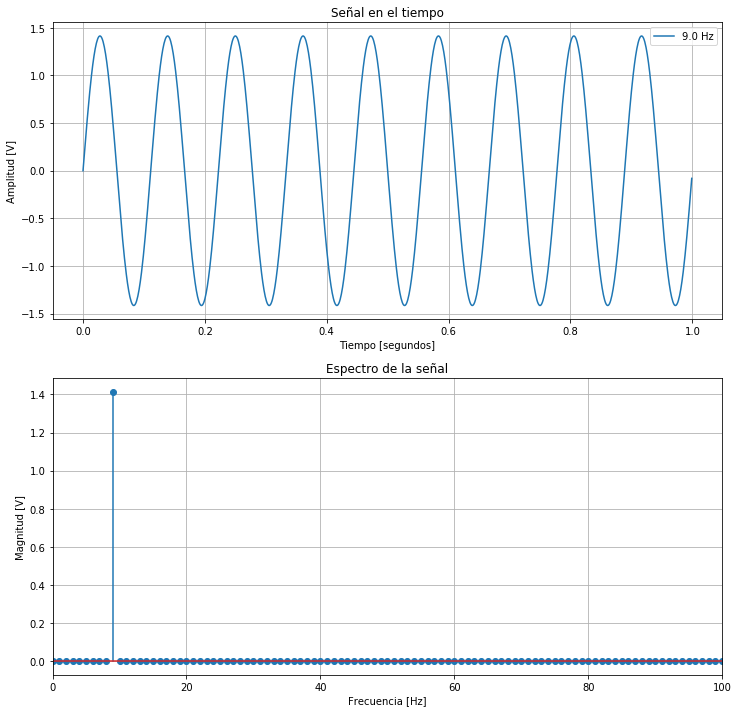

In [45]:
f0 = 9*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, signal = generador_senoidal(fs, f0, N, a0)
plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1', '1', '9 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía de una senoidal es $E = A_0^2/2$. En este caso, al ser un tono puro, toda la energía esta concentrada en esa frecuencia. Al elegir una amplitud $A_0 = \sqrt{2}$, la energía vale 1 y queda normalizada.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.11,0.01234,9 $Hz$
,,,
simulación,0.111111,0.0123456,8.0 $Hz$


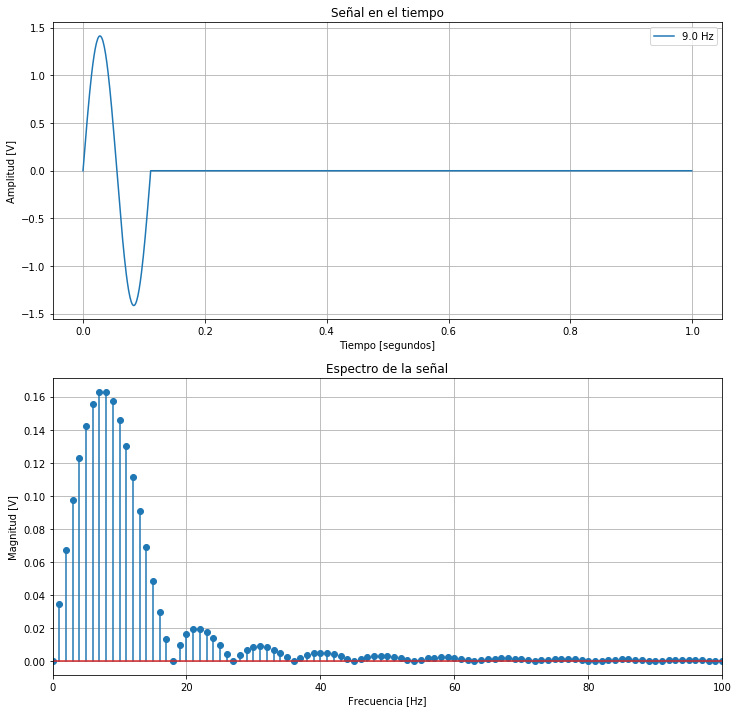

In [46]:
f0 = 9*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, signal = generador_senoidal(fs, f0, N, a0)
signal[int(fs/f0):] = 0

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.11', '0.01234', '9 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Analizando la energía total de la señal, podemos ver que esta ha disminuido. Esto se debe a que se tiene un solo ciclo de la senoidal donde antes había 9. Sabiendo que la energía esta normalizada, se deduce que el resultado total va a ser $1/9 = 0.11$.  


Por otro lado, se ve un desparramo espectral. Esto no tiene nada que ver con el leackage, sino que es un efecto provocado por la convolución del espectro de la senoidal y el de una cuadrada con periodo de $T = 1 seg$ y duty de $11.11\%$. Por este desparramo, la energía del bin correspondiente a $f_0$ será la energía total de la señal dividio 9, es decir  $1/{9x9} = 0.012345$.  



Se observa que la prediccion realizada sobre la ubicación frecuencial del máximo de energía difiere de lo obtenido en la simulación. Esto se puede justificar teniendo en cuenta que la frecuencia tonal está muy proxima al eje de simetría (frecuencia $0 Hz$). Esta cercanía provoca la deformación del espectro para satisfacer esta condición. Por este motivo, el máximo de energía no se encuentra en el bin correspondiente a $f_0$. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.11,0.01234,9 $Hz$
,,,
simulación,0.11111,0.0123455,8.0 $Hz$


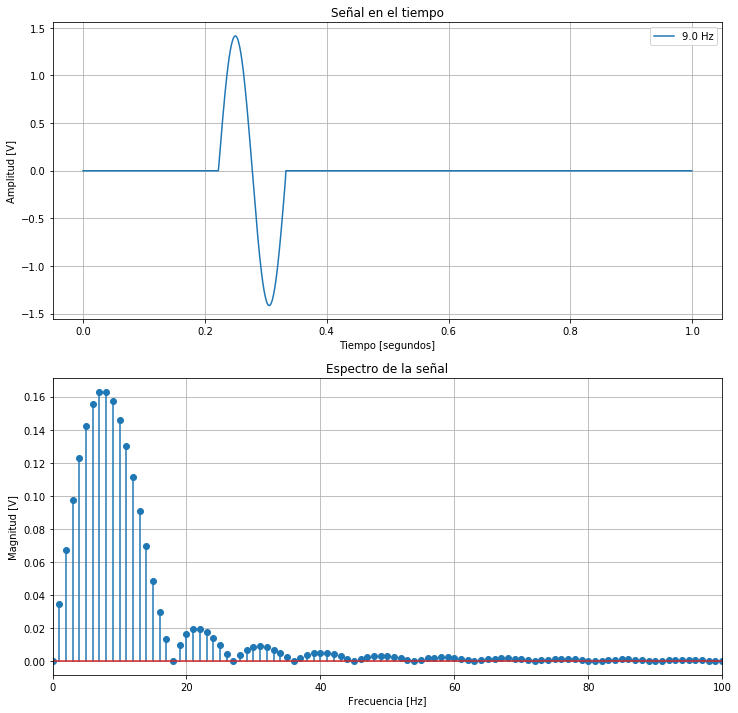

In [47]:
f0 = 9*fs/N
a0 = np.sqrt(2)
    
df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, signal = generador_senoidal(fs, f0, N, a0)
signal[:int(2*fs/f0)+1] = 0
signal[int(3*fs/f0):] = 0

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax] 

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.11', '0.01234', '9 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Este caso es análogo al anterior. La única diferencia aparece si analizamos la fase.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.2361,0.01234,8 $Hz$
,,,
simulación,0.236111,0.0157393,8.0 $Hz$


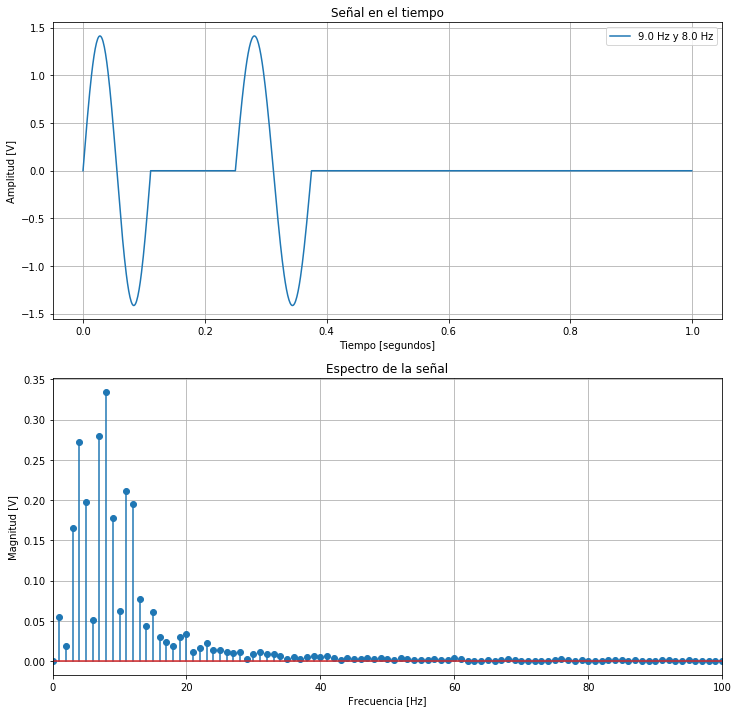

In [48]:
f01 = 9*fs/N
f02 = 8*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f01 = int(N*(f01)/fs)

tt, sen1 = generador_senoidal(fs, f01, int(N/4), a0)
sen1[int(fs/f01):] = 0
tt, sen2 = generador_senoidal(fs, f02, int(3*N/4), a0)
sen2[int(fs/f02):] = 0

signal = np.concatenate((sen1, sen2))
tt = np.linspace(0, (N-1)/fs, N)

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f01) + " Hz y " + str(f02) + ' Hz')
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f01]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax] 

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.2361', '0.01234', '8 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No se pueden distinguir las dos componentes. Como cada lóbulo principal se extiende más de un bin, lo que se ve es la suma de los dos espectros producidos por los dos tonos(y sus cuadradas). Por este motivo, la prediccion de la energía en $f_0$ fue erronea.   

Para poder diferenciarlos, se podría aumentar la cantidad de muestras $N$ lo que mejoraría la resolución espectral.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.2361,0.01234,8 $Hz$
,,,
simulación,0.236111,0.0352426,8.0 $Hz$


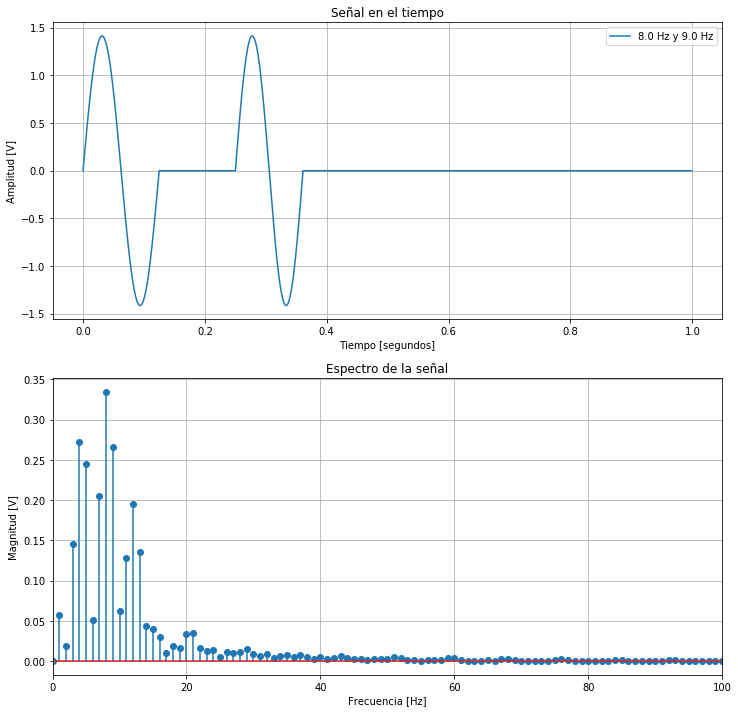

In [49]:
f01 = 8*fs/N
f02 = 9*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f02 = int(N*(f02)/fs)

tt, sen1 = generador_senoidal(fs, f01, int(N/4), a0)
sen1[int(fs/f01):] = 0
tt, sen2 = generador_senoidal(fs, f02, int(3*N/4), a0)
sen2[int(fs/f02):] = 0
signal = np.concatenate((sen1, sen2))
tt = np.linspace(0, (N-1)/fs, N)

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f01) + " Hz y " + str(f02) + ' Hz')
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f02]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]  

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.2361', '0.01234', '8 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Debido al cambio de fase de cada tono, al sumarse sus espectros el resultado es distinto. Por este motivo, la energía en el bin correspondiente a $f_0$ es distinta que en el caso anterior. El error en la predicción tiene la misma causa que el inciso anterior.  

La energía total de la señal es independiente de los cambios de fase por lo que se mantiene constante. Disponiendo unicamente del espectro, no es posible determinar que tono sucedió primero.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.33,0.11,9 $Hz$
,,,
simulación,0.333333,0.111111,9.0 $Hz$


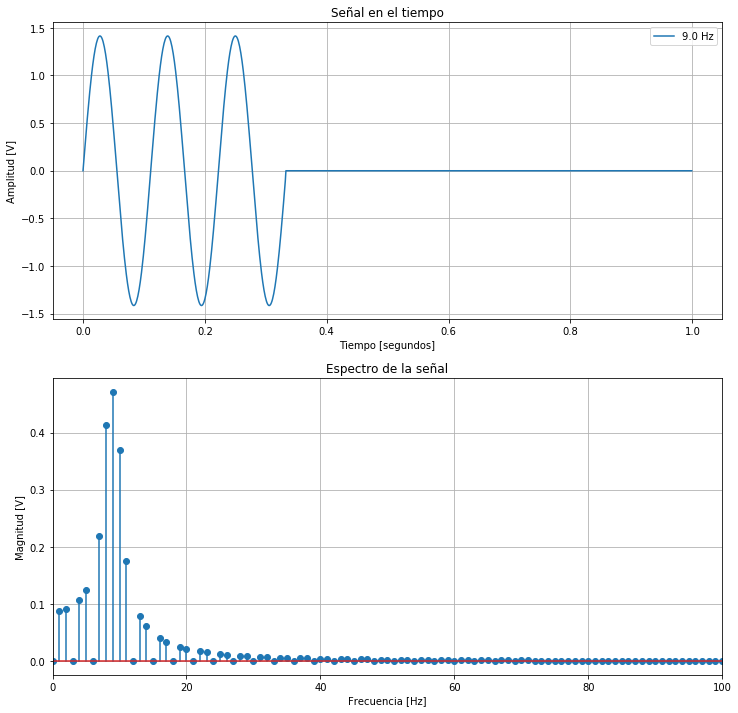

In [50]:
f0 = 9*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, signal = generador_senoidal(fs, f0, N, a0)
signal[int(3*fs/f0):] = 0

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]   

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.33', '0.11', '9 $Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En primer lugar, la energía total disminuye a un tercio del valor normalizado ya que la cantidad de muestras analizadas es tres veces la cantidad de muestras con señal senoidal. También se puede pensar que la señal donde los 9 ciclos estan presentes esta multiplicada en tiempo por una cuadrada de duty $100\%$ y en cambio la señal actual esta multiplicada por una de duty $33\%$ por lo que su energía es menor. A su vez, por el desparramo explicado en incisos anteriores, la energía del bin correspondiente a $f_0$ también es un tercio de la energía total. Teniendo esto en consideración, el resultado es $E = 1/{3x3} = 0.1111$ 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero cada ciclo con diferente amplitud.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,12.33,4.11,$9Hz$
,,,
simulación,12.3333,2.47616,9.0 $Hz$


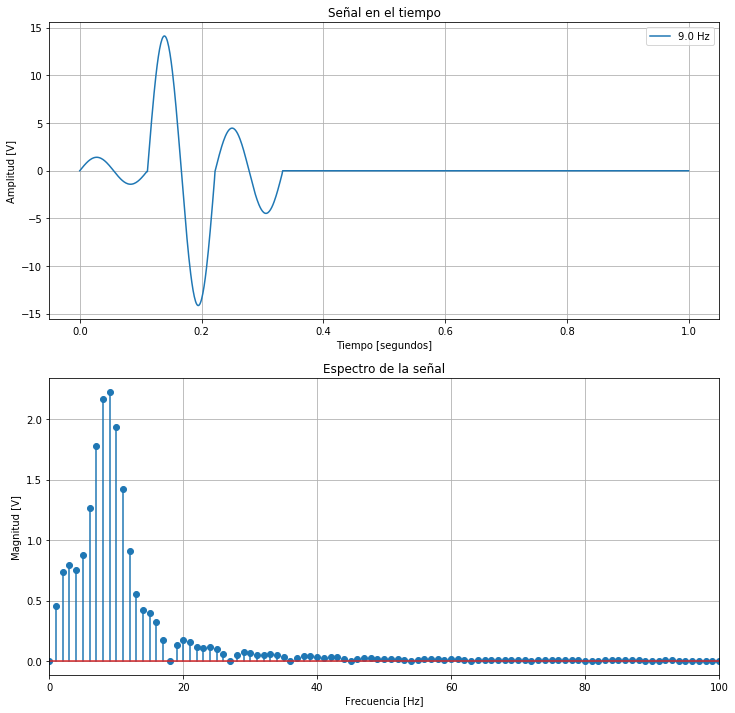

In [51]:
f0 = 9*fs/N
a1 = np.sqrt(2) 
a2 = np.sqrt(2)*np.sqrt(100)
a3 = np.sqrt(2)*np.sqrt(10)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, sen1 = generador_senoidal(fs, f0, N, a0 = a1)
sen1[int(fs/f0):] = 0

tt, sen2 = generador_senoidal(fs, f0, N, a0 = a2)
sen2[:(int(fs/f0))] = 0
sen2[int(2*fs/f0):] = 0

tt, sen3 = generador_senoidal(fs, f0, N, a0 = a3)
sen3[:(int(2*fs/f0))] = 0
sen3[int(3*fs/f0):] = 0

signal = sen1 + sen2 + sen3
tt = np.linspace(0, (N-1)/fs, N)

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal')

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]     

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['12.33', '4.11', '$9Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso, tenemos tres tonos de distinta amplitud que multiplican (en tiempo) a 3 cuadradas de duty $11\%$ pero distinta fase. Por este motivo, la predicción es distinta a lo simulado, ya que la suma de estos espectros esta afectada por la fase. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero repetida 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,37,37,$9Hz$
,,,
simulación,36.9998,22.2855,9.0 $Hz$


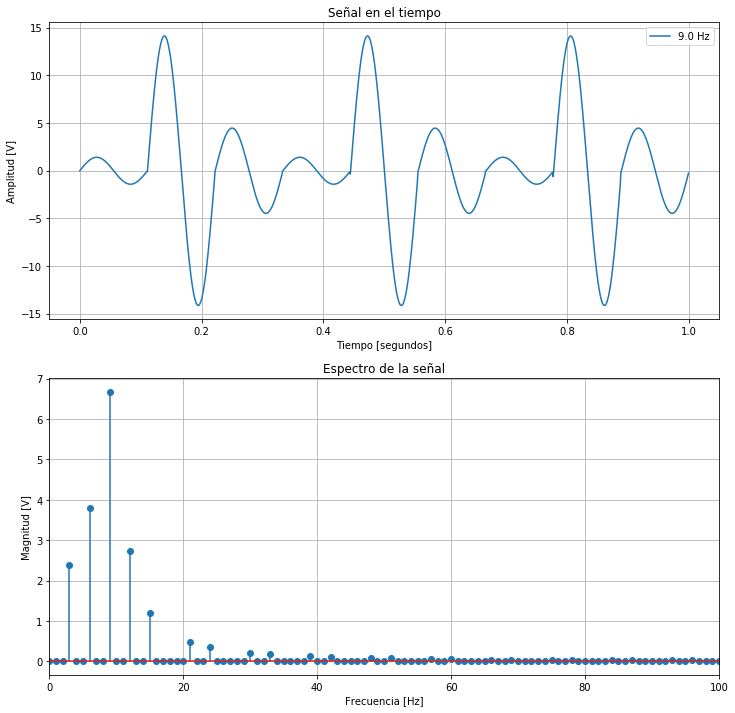

In [52]:
f0 = 9*fs/N
a1 = np.sqrt(2) 
a2 = np.sqrt(2)*np.sqrt(100)
a3 = np.sqrt(2)*np.sqrt(10)


df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, sen1 = generador_senoidal(fs, f0, N, a0 = a1)
sen1[int(fs/f0):int(3*fs/f0)] = 0
sen1[int(4*fs/f0):int(6*fs/f0)] = 0
sen1[int(7*fs/f0):] = 0

tt, sen2 = generador_senoidal(fs, f0, N, a0 = a2)
sen2[:(int(fs/f0))] = 0
sen2[int(2*fs/f0):int(4*fs/f0)] = 0
sen2[int(5*fs/f0):int(7*fs/f0)] = 0
sen2[int(8*fs/f0):] = 0

tt, sen3 = generador_senoidal(fs, f0, N, a0 = a3)
sen3[:(int(2*fs/f0))] = 0
sen3[int(3*fs/f0):int(5*fs/f0)] = 0
sen3[int(6*fs/f0):int(8*fs/f0)] = 0

signal = sen1 + sen2 + sen3

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal') 

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]   

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['37', '37', '$9Hz$'], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Respecto a la señal del inciso anterior, esta tiene 9 veces su energía en $f_0$.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$0.22$,$0$,
,,,
simulación,0.222222,1.95158e-12,5.0 $Hz$


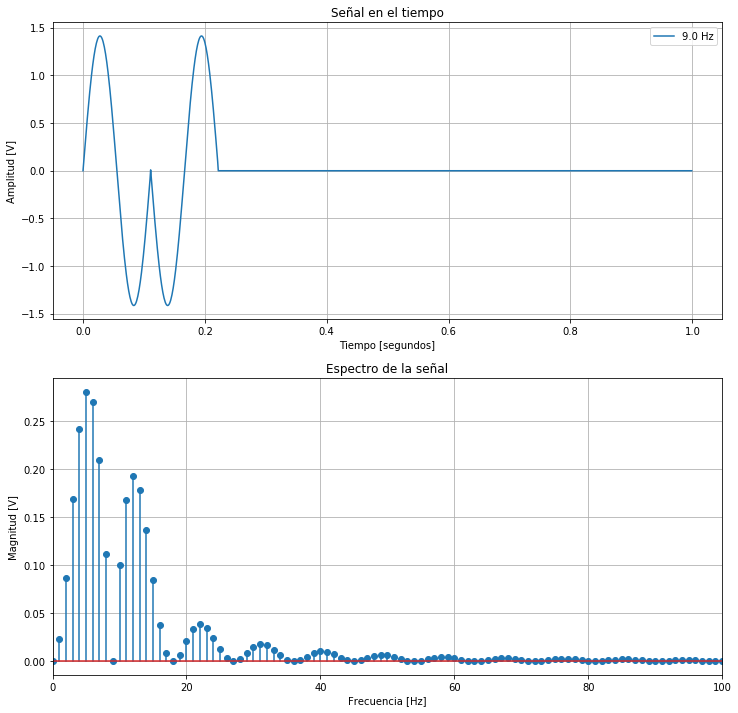

In [53]:
f0 = 9*fs/N
a0 = np.sqrt(2)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

m_f0 = int(N*(f0)/fs)

tt, sen1 = generador_senoidal(fs, f0, N, a0)
sen1[int(fs/f0):] = 0

tt, sen2 = generador_senoidal(fs, f0, N, a0, p0 = np.pi)
sen2[:(int(fs/f0))] = 0
sen2[int(2*fs/f0):] = 0

signal = sen1 + sen2

plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(tt, signal, label = str(f0) + " Hz")
plt.grid()
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.title('Señal en el tiempo')
axes_hdl = plt.gca()    # Tomo el objeto axes (Lugar donde se grafica)
axes_hdl.legend(loc='upper right')

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

plt.subplot(2,1,2)
plt.stem(ff[0:int(N//2+1)], 2.0/N * np.abs(spectrum[0:int(N//2+1)]))
plt.xlabel('Frecuencia [Hz]')
plt.xlim((0,100))
plt.grid()
plt.ylabel('Magnitud [V]')
plt.title('Espectro de la señal') 

energia_total = energy(spectrum)
energia_f0 = pow(2.0/N * np.abs(spectrum[m_f0]),2)/2

imax = np.where(np.abs(spectrum[0:int(N//2+1)]) == np.max(np.abs(spectrum[0:int(N//2+1)])))
max_f = ff[imax]  

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['$0.22$', '$0$', ''], # <-- completar acá
                  ['', '', ''], 
                  [energia_total, energia_f0, str(max_f[0]) + ' $Hz$']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al estar en contrafase, la energía en $f_0$ es nula. Sin embargo, la energía total de la señal es igual a la que se espera de dos ciclos de senoidal.  

Con respecto a la ubicación frecuencial del maximo del energía, este se desplaza hacia las frecuencias bajas forzado por la simetría espectral necesaria en $0 Hz$.  
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La medición de energía en el dominio frecuencial es fiable como lo define el teorema de Parseval.  

En cuanto al contenido espectral, vemos como la interacción de los espectros de las distintas señales sumado a la simetría necesaria en $0$ y $N/2$ (que fuerza una asimetría en el espectro) puede hacer que esta medición no sea del todo fiable.

Por lo mencionado anteriormente, la medición de energía en un determinado ancho de banda (abarcando el lóbulo principal) es más precisa que midiendo una sola componente espectral ya que existe desparramo.  

La información temporal del espectro de una señal está contenida en su fase. Sin embargo, esta información no es suficiente como para determinar la localización temporal de un determinado componente espectral.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


In [54]:
def quantizer(x, b, rango):
    """ 
    
    brief:  Cuantizador de b bits
    
    signal:     Señal en el dominio del tiempo
    b:          Cantidad de bits de cuantizador
    rango:      Rango de tensiones de entrada (-rango/2:rango/2)
    
    como resultado la señal devuelve:
    
    signal_q:   Señal cuantizada
    """ 
    # Saturacion
    signal = np.copy(x) # Sin esto, se modifica la señal pasada por parametro
    i = np.where(np.abs(signal) > rango/2)
    signal[i] = np.sign(signal[i])*rango/2
    
    Q = pow(2, b - 1) -1
    cuentas = np.round(signal*Q/(rango/2))
    signal_q = cuentas*((rango/2)/Q)
    
    return signal_q

<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [62]:
a0 = np.sqrt(2)             # Amplitud de la senoidal
f0 = 5                      # Frecuencia de la senoidal
cantidad_bits = (4, 8, 16)  # Cantidad de bits de los cuantizadores
rango = 2                   # Rango del cuantizador
energia_total_q_real = []   # Lista donde guardo la energia total de la señal cuantizada real
energia_total_q = []        # Lista donde guardo la energia total de la señal cuantizada ideal
energia_total_e_real = []   # Lista donde guardo la energia total del error de la señal real
energia_total_e = []        # Lista donde guardo la energia total del error de la señal ideal
errores_real = []           # Lista donde guardo los errores de la señal real
errores = []                # Lista donde guardo los errores de la señal ideal
signals_q_real = []         # Lista donde guardo las señales cuantizadas reales
signals_q = []              # Lista donde guardo las señales cuantizadas ideales

df = fs/N   # Resolucion espectral
ff = np.linspace(0, int((N-1)*df), int(N))

tt, s = generador_senoidal(fs, f0, N, a0)
tt, n = generador_ruido(fs, N, mean = 0, variance = 0.1, distribution = 'Normal')
s_real = s + n

# Normalizo en amplitud para que no sature el cuantizador
s_real = s_real / np.max(np.abs(s_real))
s = s / np.max(np.abs(s))

energia_total = energy(spectrum_analyzer(s_real, fs, N, plot = False))

for b in cantidad_bits:

    # Cuantizacion de señal ideal
    s_q = quantizer(s, b, rango)
    signals_q.append(s_q)
    energia_total_q.append(energy(spectrum_analyzer(s_q, fs, N, plot = False)))
    e = s_q - s
    errores.append(e)
    energia_total_e.append(energy(spectrum_analyzer(e, fs, N, plot = False)))

    # Cuantizacion de señal real
    s_q = quantizer(s_real, b, rango)
    signals_q_real.append(s_q)
    e = s_q - s_real
    errores_real.append(e)
    energia_total_q_real.append(energy(spectrum_analyzer(s_q, fs, N, plot = False)))
    energia_total_e_real.append(energy(spectrum_analyzer(e, fs, N, plot = False)))

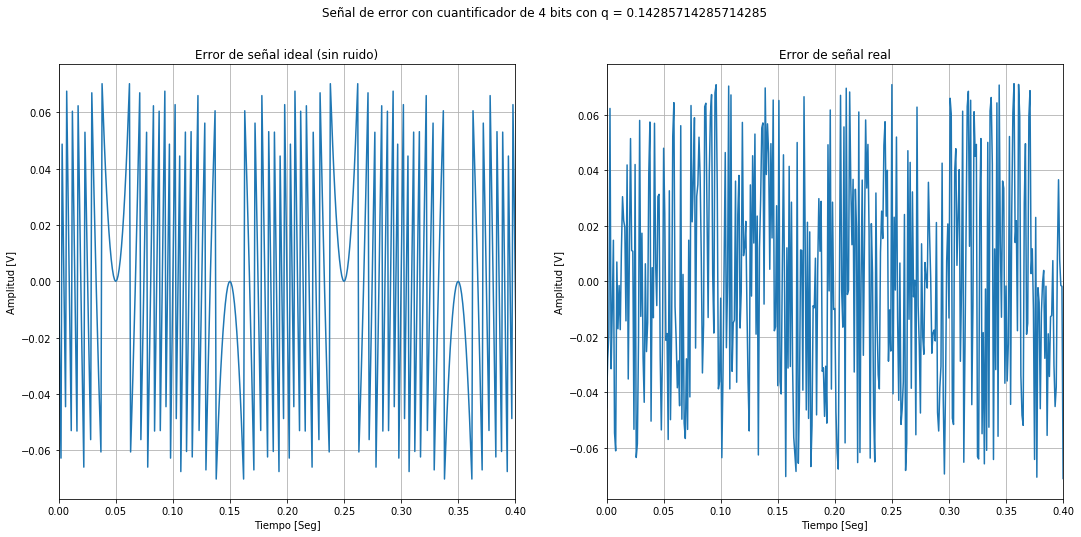

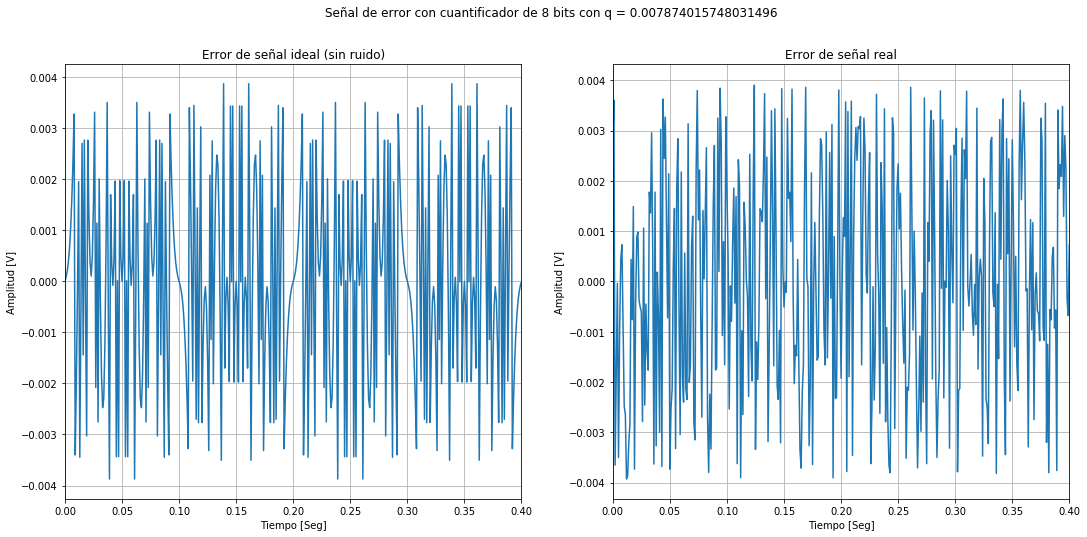

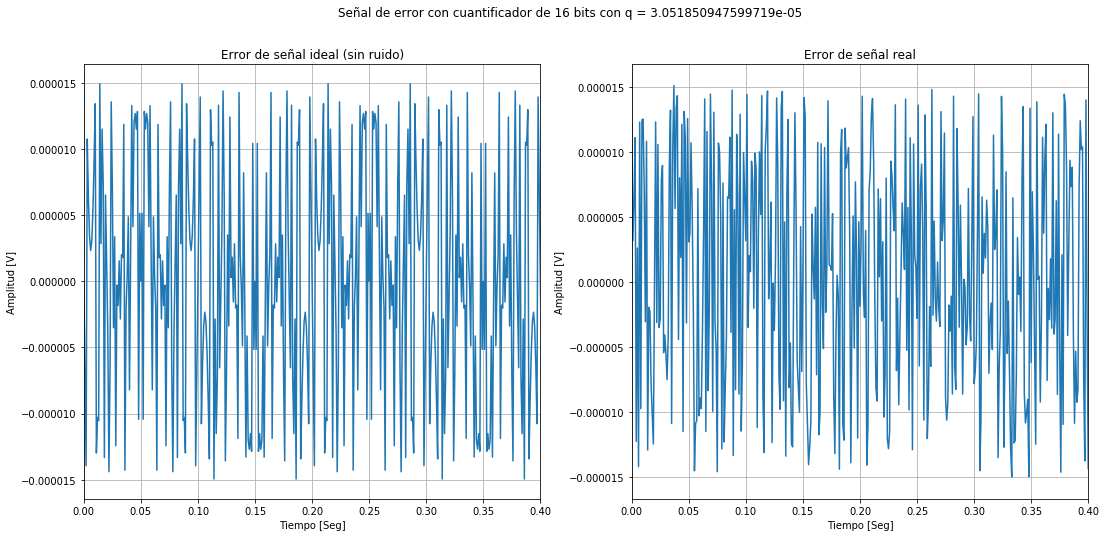

In [63]:
for b, i in zip(cantidad_bits, range(3)):

    plt.figure(figsize = (18, 8))
    plt.suptitle("Señal de error con cuantificador de " + str(b) + ' bits con q = ' + str(rango/(pow(2, b) -2)))
    
    # Ploteo la señal de error ideal
    plt.subplot(1,2,1)
    plt.title("Error de señal ideal (sin ruido)")
    plt.xlabel('Tiempo [Seg]')
    plt.ylabel('Amplitud [V]')
    plt.xlim(0, 0.4)
    plt.grid()
    plt.plot(tt, errores[i])
    
    # Ploteo la señal de error real
    plt.subplot(1,2,2)
    plt.title("Error de señal real")
    plt.xlabel('Tiempo [Seg]')
    plt.ylabel('Amplitud [V]')
    plt.xlim(0, 0.4)
    plt.grid()
    plt.plot(tt, errores_real[i])

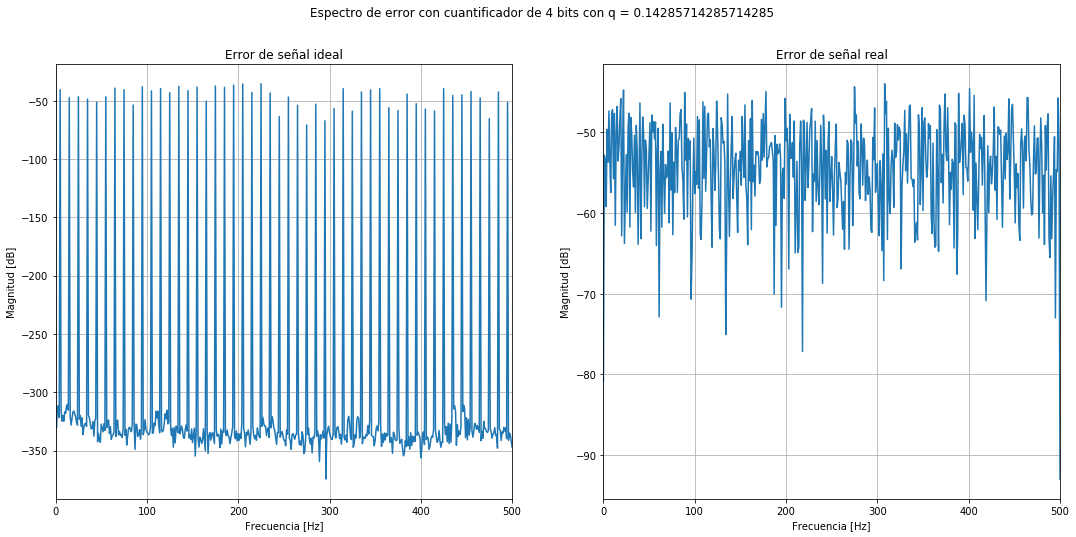

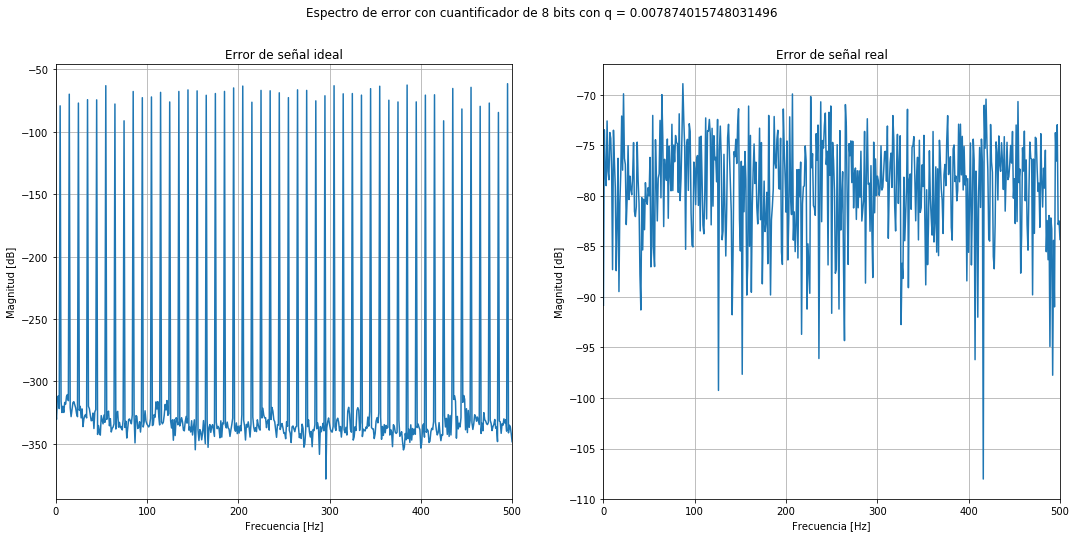

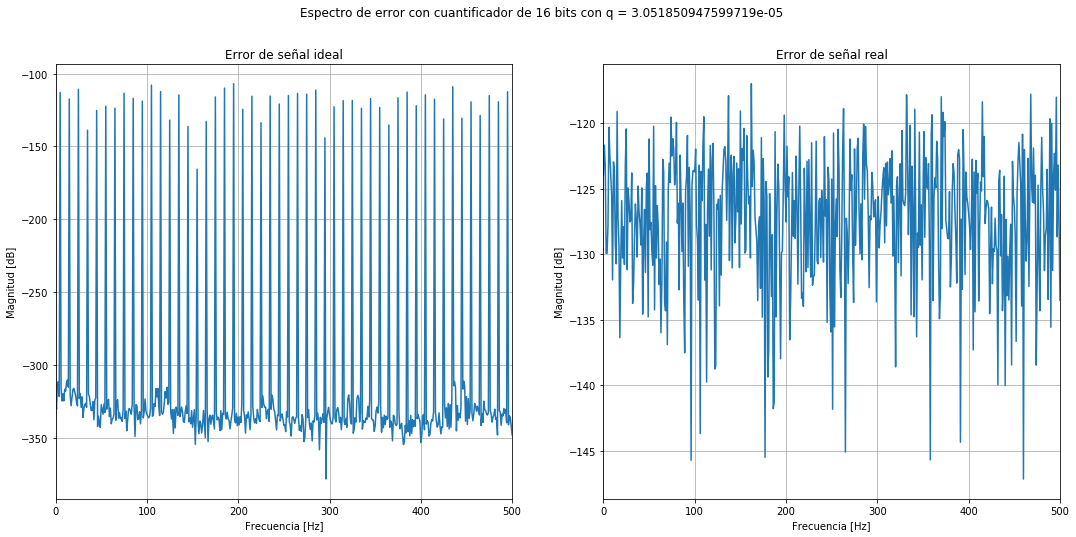

In [64]:
# Generacion del espectro del error
for b, i in zip(cantidad_bits, range(3)):

    plt.figure(figsize = (18, 8))
    plt.suptitle("Espectro de error con cuantificador de " + str(b) + ' bits con q = ' + str(rango/(pow(2, b) -2)))

    # Ploteo del espectro ideal
    plt.subplot(1,2,1)
    plt.title("Error de señal ideal")
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.xlim(0, 500)
    plt.grid()
    spectrum = spectrum_analyzer(errores[i], fs, N, plot = False)
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))

    # Ploteo del espectro real
    plt.subplot(1,2,2)
    plt.title("Error de señal real")
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.xlim(0, 500)
    plt.grid()
    spectrum = spectrum_analyzer(errores_real[i], fs, N, plot = False)
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se puede ver claramente como una señal completamente deterministica (senoidal ideal), genera que el error de cuantización tenga cierto grado de determinismo.  

A su vez, podemos ver como al aumentar la cantidad de bits, disminuye el ruido generado por la cuantización.
</div>

In [65]:
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   [energia_total, energia_total_q_real[0], energia_total_e_real[0]], # <-- completar acá
                   [energia_total, energia_total_q_real[1], energia_total_e_real[1]], # <-- completar acá
                   [energia_total, energia_total_q_real[2], energia_total_e_real[2]], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,0.186163,0.187492,0.00168693
8 bits,0.186163,0.186131,5.09004e-06
16 bits,0.186163,0.186163,7.9268e-11


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos ver como al aumentar el numero de bits, la energía total Q tiende a igualarse con la energía total (sin cuantizar). Esto se debe a la disminución de la energía de ruido.
</div>

<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

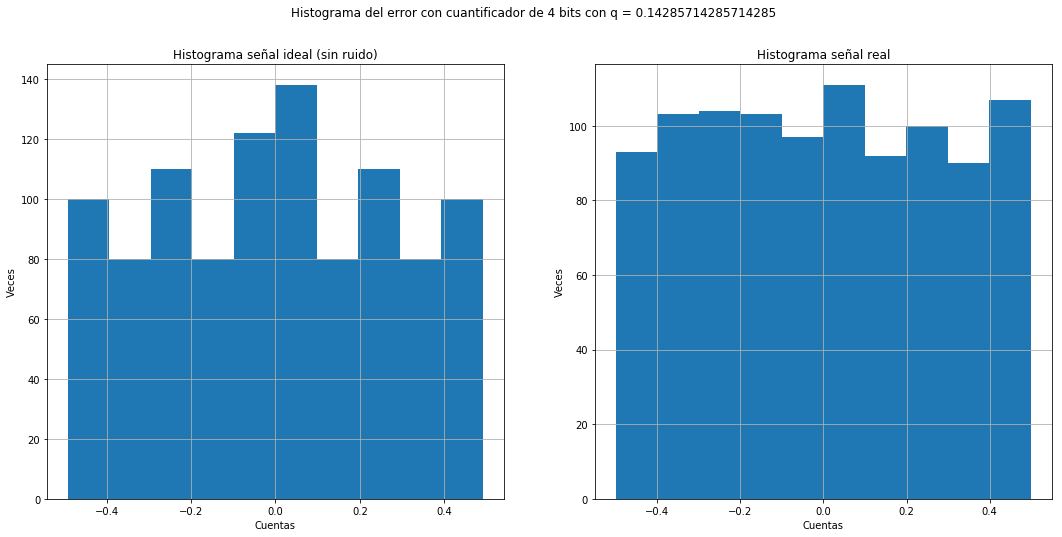

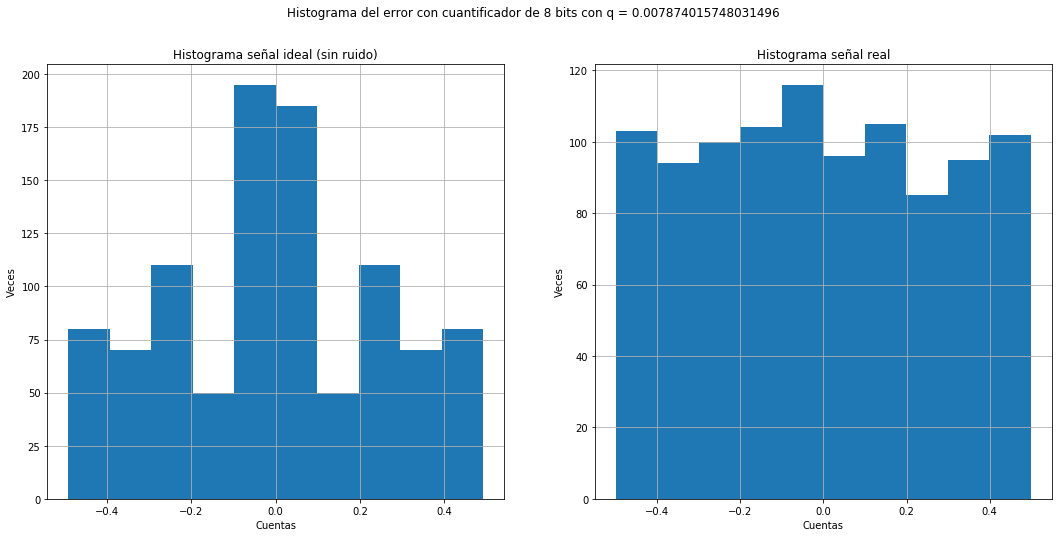

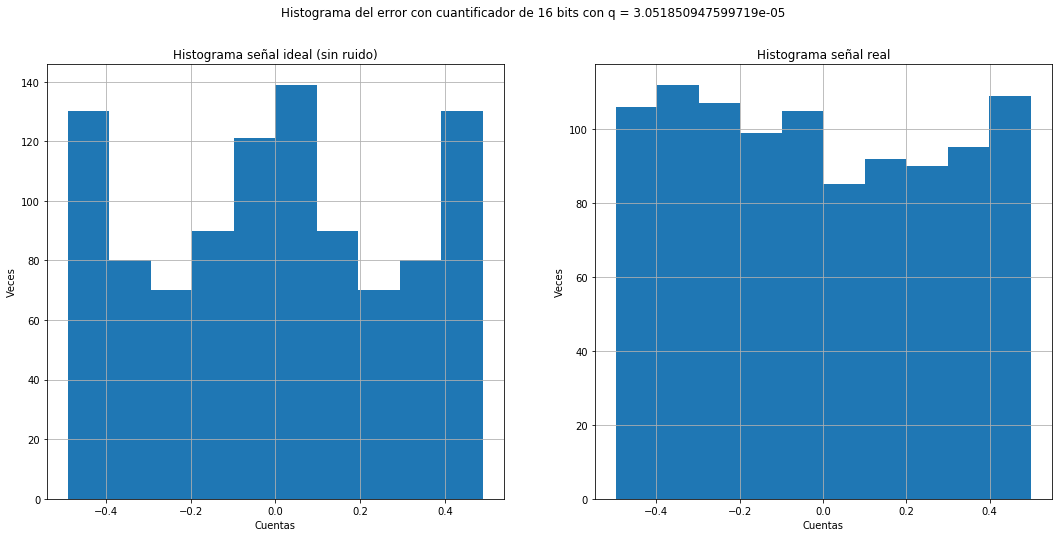

In [66]:
for b, i in zip(cantidad_bits, range(3)):

    plt.figure(figsize = (18, 8))
    plt.suptitle("Histograma del error con cuantificador de " + str(b) + ' bits con q = ' + str(rango/(pow(2, b) -2)))

    # Histograma la señal de error ideal
    plt.subplot(1,2,1)
    plt.title("Histograma señal ideal (sin ruido)")
    plt.xlabel('Cuentas')
    plt.ylabel('Veces')
    plt.grid()
    e_normalizado = errores[i]/(rango/(pow(2, b) -2))
    plt.hist(e_normalizado, bins = 10)

    # Histograma de la señal de error real
    plt.subplot(1,2,2)
    plt.title("Histograma señal real")
    plt.xlabel('Cuentas')
    plt.ylabel('Veces')
    plt.grid()
    e_normalizado = errores_real[i]/(rango/(pow(2, b) -2))
    plt.hist(e_normalizado, bins = 10)

¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos observar que en las señales reales, el ruido de cuantificacion esta uniformemente distribuido entre $(-q/2 , q/2)$. En cambio, con señales deterministicas puras, los histogramas dejan de ser uniformes.  
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [67]:
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

tus_resultados = [ 
                   [np.average(errores_real[0]), rms(errores_real[0]), energy(errores_real[0], domain = 'time')], # <-- completar acá
                   [np.average(errores_real[1]), rms(errores_real[1]), energy(errores_real[1], domain = 'time')], # <-- completar acá
                   [np.average(errores_real[2]), rms(errores_real[2]), energy(errores_real[2], domain = 'time')], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,4.524638e-05,0.041072,1.686933e-03
8 bits,-1.437116e-05,0.002256,5.088913e-06
16 bits,-3.177505e-07,0.000009,7.915590e-11


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [68]:
tus_resultados = [ 
                   [np.mean(errores_real[0]), np.std(errores_real[0]), np.var(errores_real[0])], # <-- completar acá
                   [np.mean(errores_real[1]), np.std(errores_real[1]), np.var(errores_real[1])], # <-- completar acá
                   [np.mean(errores_real[2]), np.std(errores_real[2]), np.var(errores_real[2])], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,4.524638e-05,0.041072,1.686931e-03
8 bits,-1.437116e-05,0.002256,5.088707e-06
16 bits,-3.177505e-07,0.000009,7.905494e-11


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos ver la correspondencia del valor medio con la media estadística, el valor RMS con el desvío estándard y la energía con la varianza.  

Da lo mismo desde que punto de vista se describa una señal, ya que tienen caracteristicas análogas.

</div>